In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

 # Dataset:
UCI machine learning repository. (n.d.). Uci.edu. Retrieved February 8, 2024, from https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope


In [2]:
cols = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df = pd.read_csv('magic04.data', names = cols)

In [3]:
df['class'] = (df['class'] == 'g').astype(int)

In [4]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


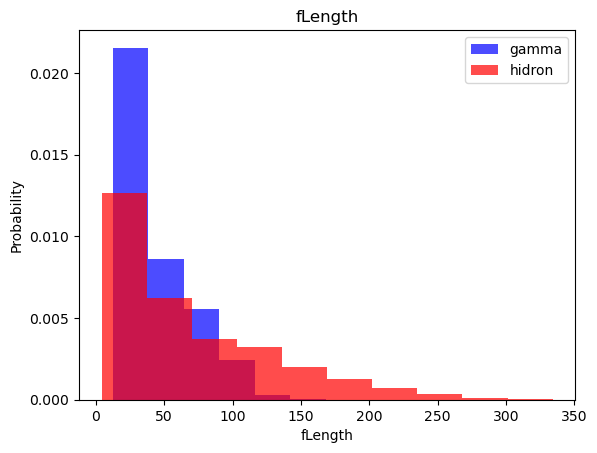

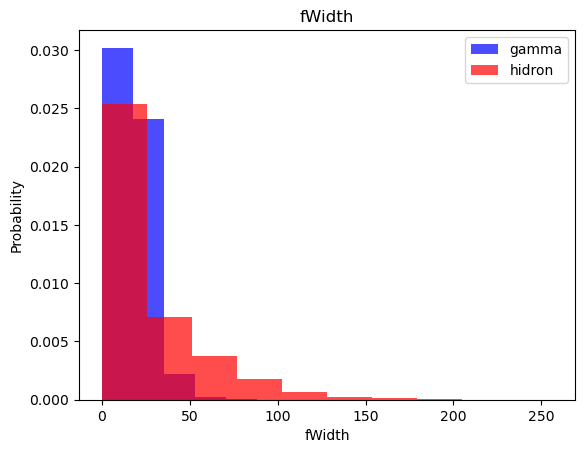

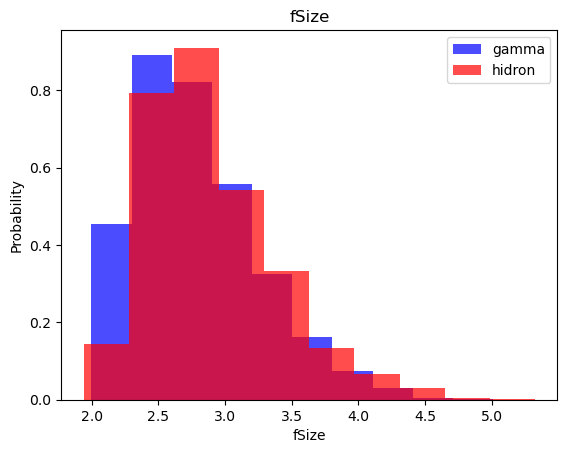

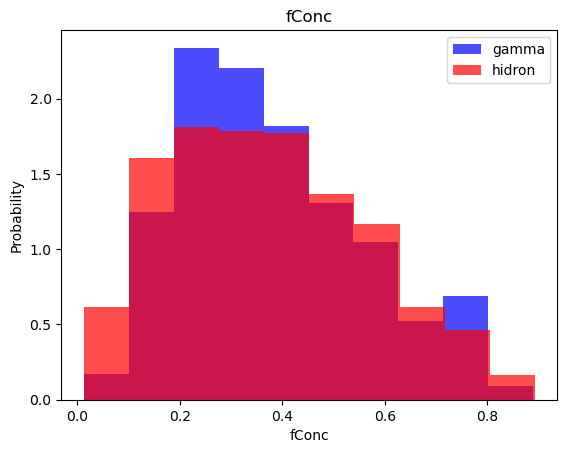

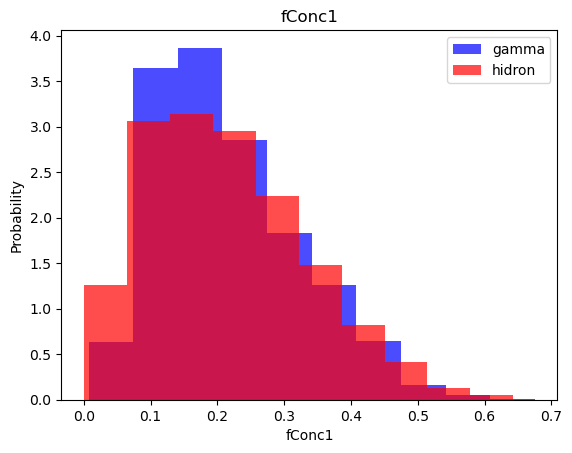

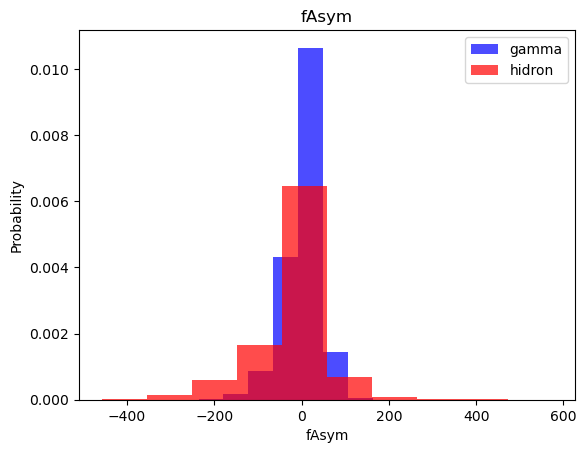

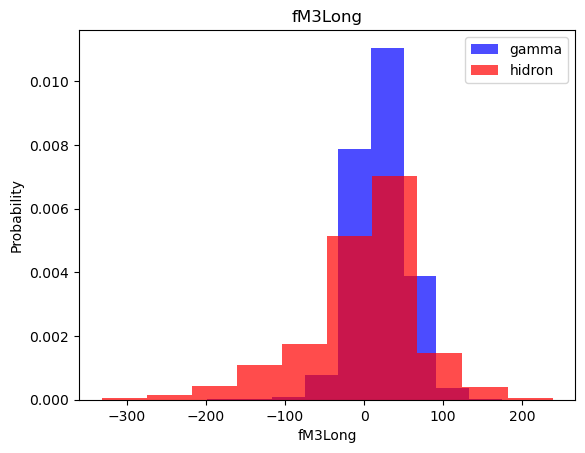

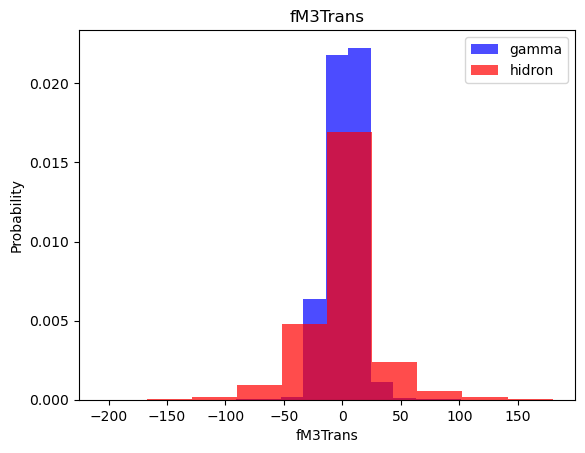

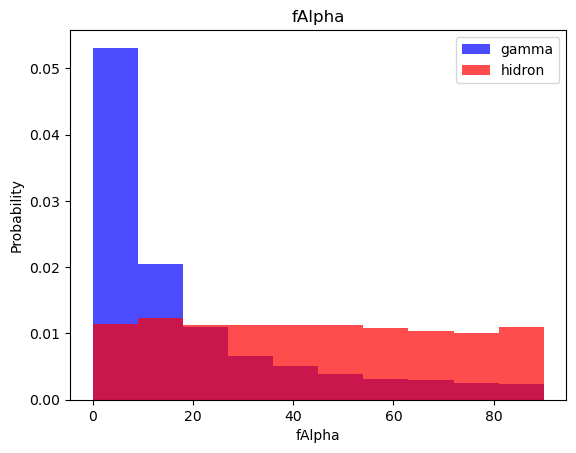

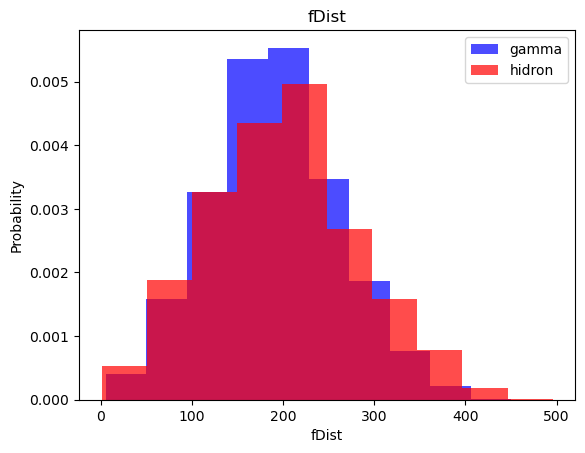

In [5]:
for label in cols[:-1]:
    plt.hist(df[df['class'] == 1][label], color = 'blue', label = 'gamma', alpha= 0.7, density = True)
    plt.hist(df[df['class'] == 0][label], color = 'red', label = 'hidron', alpha= 0.7, density = True)
    
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train, validation and test

In [6]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])

In [7]:
def scale_dataset(dataframe, oversample = False):
    x =dataframe[dataframe.columns[:-1]].values
    y =dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    if oversample:
        ros = RandomOverSampler()
        x, y= ros.fit_resample(x, y)
    
    data = np.hstack((x, np.reshape(y, (-1,1))))
    
    return data, x, y


In [8]:
train, x_train, y_train = scale_dataset(train, oversample= True)
valid, x_valid, y_valid = scale_dataset(valid, oversample= False)
train, x_test, y_test = scale_dataset(test, oversample= False)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [10]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred= knn_model.predict(x_test)

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1339
           1       0.86      0.86      0.86      2465

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



In [13]:
y_test

array([0, 1, 1, ..., 0, 1, 1])

# Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)


GaussianNB()

In [19]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.38      0.49      1339
           1       0.73      0.90      0.81      2465

    accuracy                           0.72      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.71      0.72      0.69      3804



In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)

LogisticRegression()

In [24]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1339
           1       0.84      0.82      0.83      2465

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.78      0.79      3804

